# Clustering Practice

About data: 
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
In repository it is labeled as Classification task, but I will use it for clustering and then will be able to check accuracy of clustering.
Resource: https://archive.ics.uci.edu/ml/datasets/wine

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [3]:
dataset = pd.read_csv('wine.data', names = ['Class',  'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',  'Magnesium', 'Total phenols', 'Flavanoids',
                                            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'])


In [4]:
y = dataset.iloc[:, 0].values # exclude Class
X = dataset.iloc[:, 1:].values

# Feature scaling

We should scale features because clustering algorithms are certainly effected by the feature scaling.

In [5]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Using the elbow method to find the optimal number of clusters

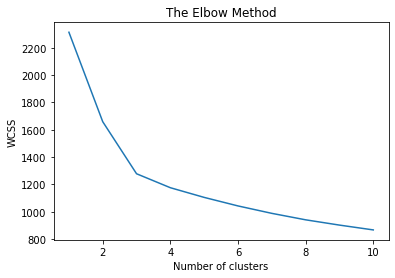

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the plot the optimal value of classes is 3 ( 4 and more classes don't make valuable improvement)

## Training the K-Means model on the dataset

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) # init k-means++ helps not to catch random initilization trap
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Visualising the clusters and results

I chose two variables from 13 to somehow depict the clusters and compare them with real classes (visualising using PCA will be in 8 topic)

In [11]:
from sklearn.linear_model import LinearRegression

classifier_log_reg = LinearRegression()
classifier_log_reg.fit(X, y_kmeans)
classifier_log_reg.coef_

array([-0.16469947, -0.12574898, -0.09521324,  0.03443241, -0.06139692,
       -0.00845144,  0.16875777, -0.00373033,  0.07799572, -0.24118677,
        0.14031837,  0.13453929, -0.12125677])

In [12]:
X_df = pd.DataFrame(X, columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',  'Magnesium', 'Total phenols', 'Flavanoids',
                                            'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline'])

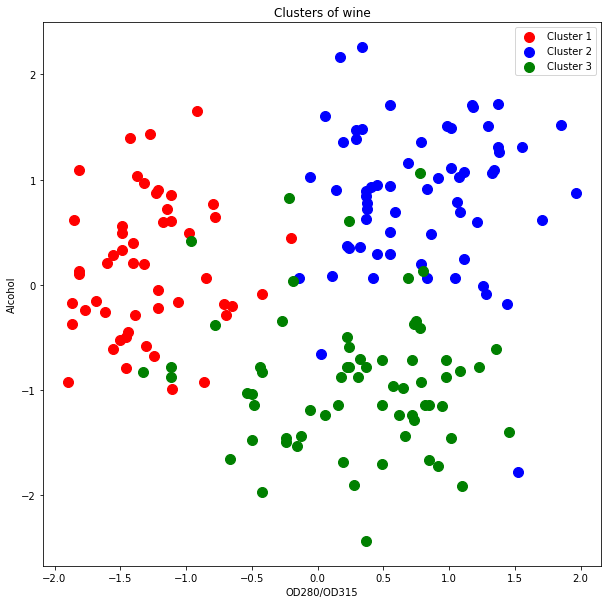

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(X_df['OD280/OD315'][y_kmeans == 0], X_df['Alcohol'][y_kmeans == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_df['OD280/OD315'][y_kmeans == 1], X_df['Alcohol'][y_kmeans == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_df['OD280/OD315'][y_kmeans == 2], X_df['Alcohol'][y_kmeans == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of wine')
plt.xlabel('OD280/OD315')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

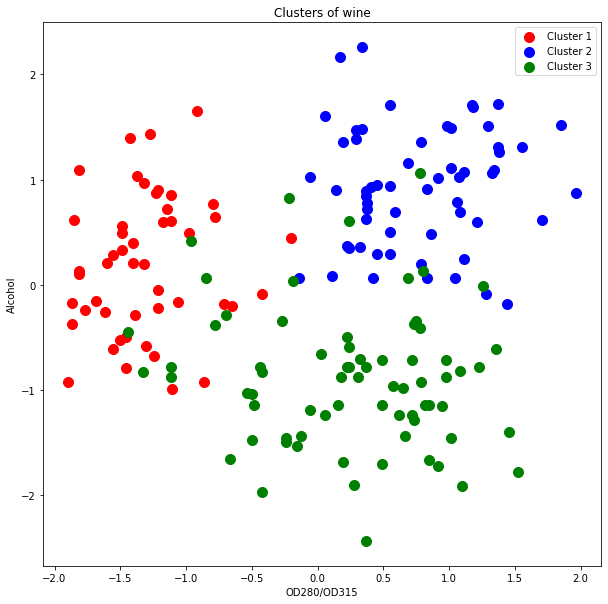

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(X_df['OD280/OD315'][y == 3], X_df['Alcohol'][y == 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_df['OD280/OD315'][y == 1], X_df['Alcohol'][y == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_df['OD280/OD315'][y == 2], X_df['Alcohol'][y == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of wine')
plt.xlabel('OD280/OD315')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

Now, lets compare y_kmeans - predicted clusters and y - real clusters

In [16]:
# changing labels to get right confusion matrix
transdict = {0: 3}
y_kmeans_repl = [transdict.get(i, i) for i in y_kmeans]

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y, y_kmeans_repl))
print(accuracy_score(y, y_kmeans_repl))

[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]
0.9662921348314607


So, there is only 6 wrong observations in clusters

# Hierarchical Clustering

## Using the dendrogram to find the optimal number of clusters

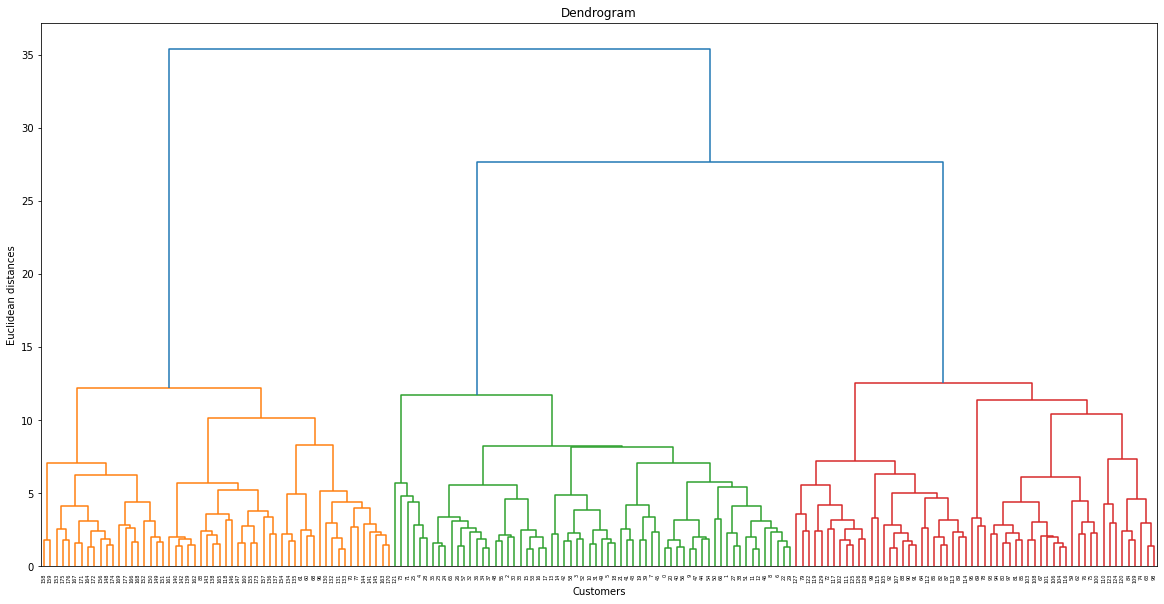

In [18]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

To choose number of clusters we should find the longest vertical line which doesn't cross horizontal lines and then number of clusters will be number of vertical lines which it crosses. Here is line between 12 and 28 euclidian distances, so we should choose 3 classes.

## Training the Hierarchical Clustering model on the dataset

Here is training agglomerative approach of hierarchical clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [20]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## Visualising the clusters and results

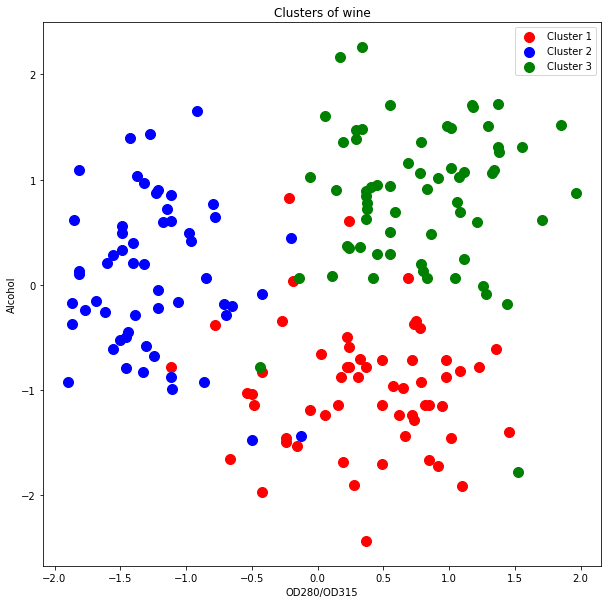

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(X_df['OD280/OD315'][y_hc == 0], X_df['Alcohol'][y_hc == 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_df['OD280/OD315'][y_hc == 1], X_df['Alcohol'][y_hc == 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_df['OD280/OD315'][y_hc == 2], X_df['Alcohol'][y_hc == 2], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of wine')
plt.xlabel('OD280/OD315')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

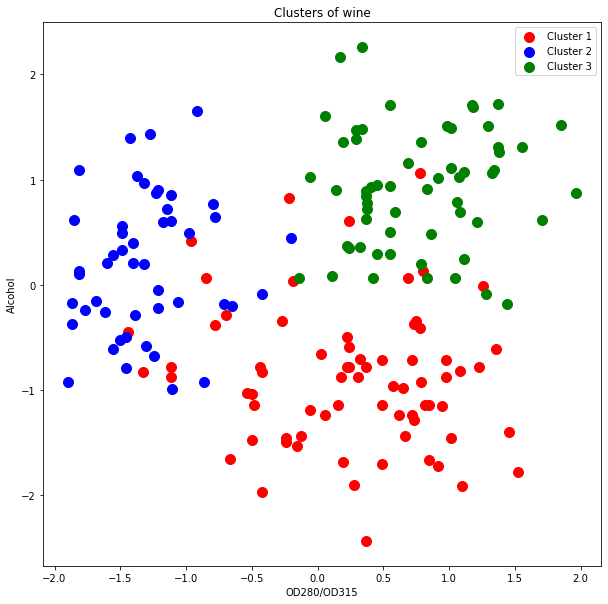

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(X_df['OD280/OD315'][y == 2], X_df['Alcohol'][y == 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_df['OD280/OD315'][y == 3], X_df['Alcohol'][y == 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_df['OD280/OD315'][y == 1], X_df['Alcohol'][y == 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of wine')
plt.xlabel('OD280/OD315')
plt.ylabel('Alcohol')
plt.legend()
plt.show()

Now, lets compare y_hc - predicted clusters and y - real clusters

In [23]:
# changing labels to get right confusion matrix
transdict = {0: 2, 1: 3, 2:1}
y_hc_repl = [transdict.get(i, i) for i in y_hc]

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y, y_hc_repl))
print(accuracy_score(y, y_hc_repl))

[[59  0  0]
 [ 5 58  8]
 [ 0  0 48]]
0.9269662921348315


This clustering approach gives 13 wrong predicts

### Conclusions

k-Means gives better result for this data than Hierarchical approach, but both methods shows that there better to be 3 classes like in real data set. For large amount of data we should use k-Means because of it speed, fewer distance calculations.